In [ ]:
!pip install --q tensorflow-io
# !pip install tensorflow==2.4.2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import cv2 as cv 
import os 
from pathlib import Path
import tensorflow_io as tfio
import tensorflow_hub as hub 
from tqdm.notebook import tqdm
from pathlib import Path 

     |████████████████████████████████| 22.7 MB 1.6 MB/s 
     |████████████████████████████████| 2.3 MB 66.4 MB/s 


In [ ]:
# !pip install fastai -q


In [ ]:
# import fastai 

In [ ]:
# from fastai.vision import *

# loading in dataset 

In [ ]:
import IPython
# This file shows how to generate a sine wave using the ThinkDSP library.
import sys
# sys.path.insert(0, 'ThinkDSP/code/') 
# import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

IPython.display.Audio('/content/dataset/TestAudioFiles/10339.mp3') 

ValueError: ignored

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
!unzip "/content/drive/Shareddrives/Tabata/cogito challenge /dbb3bd26ead211eb.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/TrainAudioFiles/8352.mp3  
  inflating: dataset/TrainAudioFiles/8381.mp3  
  inflating: dataset/TrainAudioFiles/8382.mp3  
  inflating: dataset/TrainAudioFiles/8405.mp3  
  inflating: dataset/TrainAudioFiles/8407.mp3  
  inflating: dataset/TrainAudioFiles/8415.mp3  
  inflating: dataset/TrainAudioFiles/8453.mp3  
  inflating: dataset/TrainAudioFiles/10315.mp3  
  inflating: dataset/TrainAudioFiles/10398.mp3  
  inflating: dataset/TrainAudioFiles/10431.mp3  
  inflating: dataset/TrainAudioFiles/10454.mp3  
  inflating: dataset/TrainAudioFiles/10478.mp3  
  inflating: dataset/TrainAudioFiles/10481.mp3  
  inflating: dataset/TrainAudioFiles/10501.mp3  
  inflating: dataset/TrainAudioFiles/10506.mp3  
  inflating: dataset/TrainAudioFiles/10517.mp3  
  inflating: dataset/TrainAudioFiles/10591.mp3  
  inflating: dataset/TrainAudioFiles/10607.mp3  
  inflating: dataset/TrainAudioFiles/10612.mp3  
  inflating: dataset/Trai

In [ ]:
train_df = pd.read_csv('/content/dataset/train.csv')
test_df = pd.read_csv('/content/dataset/test.csv')
submission_df = pd.read_csv('/content/dataset/sample_submission.csv')

In [ ]:
train_df.filename[0]

'18777.mp3'

In [ ]:
train_df.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [ ]:

# Importing pydub for converting our files to standard wav file format 
# !pip install pydub 

from pydub import AudioSegment

In [ ]:
filepath = '/content/dataset/TrainAudioFiles/'+ train_df.filename[5812]

In [ ]:
sound = AudioSegment.from_mp3(filepath)

In [ ]:
# sound.get_array_of_samples()
np.frombuffer(sound.get_array_of_samples(), dtype=np.int16).shape

(34167,)

In [ ]:
# train_df.isna().sum()
train_df.tail()

,filename,emotion
5811,6688.mp3,neutral
5812,41901.wav,fear
5813,2066.mp3,neutral
5814,10825.mp3,surprise
5815,21904.mp3,neutral


In [ ]:
# test_df.isna().sum()
filepath

'/content/dataset/TrainAudioFiles/41901.wav'

In [ ]:
def preprocess_df(df,base_path = '/content/dataset/TrainAudioFiles/'):
  for i,x in enumerate(df['filename']):

    df['filename'][i] = str(base_path+ df['filename'][i])
  try:
    bf = pd.get_dummies(df['emotion'])
  except : 
    print('looks like test data huh ! ')
    return df 

  return pd.concat([df,bf],axis = 1 )

In [ ]:
input_files= tf.io.gfile.glob(train_df.filename.to_numpy())

In [ ]:
input_files_01 = train_df.filename.to_numpy()

In [ ]:
train_df = preprocess_df(train_df)

In [ ]:
test_df = preprocess_df(test_df , base_path = '/content/dataset/TestAudioFiles/')

looks like test data huh ! 


In [ ]:
train_df

,filename,emotion,anger,disgust,fear,joy,neutral,sadness,surprise
0,/content/dataset/TrainAudioFiles/18777.mp3,neutral,0,0,0,0,1,0,0
1,/content/dataset/TrainAudioFiles/24041.mp3,neutral,0,0,0,0,1,0,0
2,/content/dataset/TrainAudioFiles/1621.mp3,joy,0,0,0,1,0,0,0
3,/content/dataset/TrainAudioFiles/28883.mp3,neutral,0,0,0,0,1,0,0
4,/content/dataset/TrainAudioFiles/14918.mp3,neutral,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5811,/content/dataset/TrainAudioFiles/6688.mp3,neutral,0,0,0,0,1,0,0
5812,/content/dataset/TrainAudioFiles/41901.wav,fear,0,0,1,0,0,0,0
5813,/content/dataset/TrainAudioFiles/2066.mp3,neutral,0,0,0,0,1,0,0
5814,/content/dataset/TrainAudioFiles/10825.mp3,surprise,0,0,0,0,0,0,1


In [ ]:
train_df = train_df.drop(index = 18)

In [ ]:
train_df.filename.isna().sum()

0

In [ ]:
# check_1  = [x.exists() and 1  for x in train_df.filename.to_numpy()]
# check_2  = [x.exists() and 1  for x in test_df.filename.to_numpy()]

In [ ]:
# check_1.count(0),check_2.count(0)

In [ ]:
# len(check_1), len(check_2)

In [ ]:
file_tensor = tf.cast(train_df.filename.to_numpy(),tf.string)


In [ ]:
cols = train_df.select_dtypes(include=['object'])
for col in cols.columns.values:
    train_df[col] = train_df[col].fillna('')


In [ ]:
# is_mp3= 0 
# is_wav = 0 
# for x in filenames.numpy():
#   x = x.decode('utf-8')
#   if x[-3:] == 'mp3':
#     is_mp3 +=1 
#   else:
#     is_wav +=1 

# print(is_mp3,is_wav)

In [ ]:
# @tf.function
def decode_audio(file_path):
  try:
    file_path = file_path.decode('utf-8')
  except: 
    pass 
  # print(file_path)
  audio_binary = tf.io.read_file(file_path)
  if file_path[-3:] == 'mp3':
    audio= tfio.audio.decode_mp3(audio_binary)
    audio = np.array(audio)[:,:-1]
    sample_rate = [48048]
  else :
    audio,sample_rate = tf.audio.decode_wav(audio_binary)
    # print(audio.shape)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  audio = tf.squeeze(audio, axis = -1)
  # wav = tfio.audio.resample(audio, rate_in=sample_rate,rate_out= 16000)

  if audio.shape[0] < 100000:
    to_append = 100000 - audio.shape[0]
    # print(to_append)
    # print(audio.numpy())
    audio = np.concatenate((audio.numpy(),np.zeros(to_append).astype(np.float32)))
  
  return audio

# Utility functions for loading audio files and making sure the sample rate is correct.

# @tf.function
# def load_wav_16k_mono(filename):
#     """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
#     file_contents = tf.io.read_file(filename)
#     wav, sample_rate = tf.audio.decode_wav(
#           file_contents,
#           desired_channels=1)
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav

In [ ]:
# def get_spectrogram(file_path):

#   waveform = decode_audio(file_path)
#   # Padding for files with less than 16000 samples
#   zero_padding = tf.zeros([2000000]- tf.shape(waveform), dtype=tf.float32)

#   # Concatenate audio with padding so that all audio clips will be of the 
#   # same length
#   waveform = tf.cast(waveform, tf.float32)
#   equal_length = tf.concat([waveform, zero_padding], 0)
#   spectrogram = tf.signal.stft(
#       equal_length, frame_length=255, frame_step=128)
      
#   spectrogram = tf.abs(spectrogram)

#   return spectrogram

In [ ]:
filenames = tf.convert_to_tensor(train_df['filename'].astype(str).to_numpy())

In [ ]:
# file_dataset = tf.data.Dataset.from_tensor_slices(filenames).map(decode_audio)

In [ ]:
filenames[0].numpy().decode('utf-8')

'/content/dataset/TrainAudioFiles/18777.mp3'

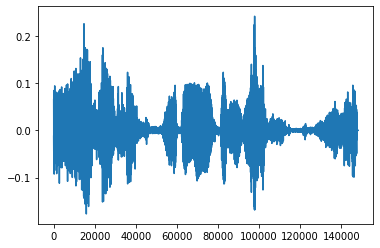

In [ ]:

audio = decode_audio(filenames[1].numpy())
# _ = plt.plot(testing_wav_data)
plt.figure()
plt.plot(audio)
# print(testing_wav_data.shape, audio.shape)

In [ ]:
IPython.display.Audio(audio,rate = 44100)

In [ ]:
filenames[7]

<tf.Tensor: shape=(), dtype=string, numpy=b'/content/dataset/TrainAudioFiles/50666.wav'>

In [ ]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [ ]:
audio_data = []

In [ ]:
def extract_embedding(wav_data):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  return embeddings

In [ ]:
for x in filenames:
  audio = decode_audio(x.numpy())
  extracted_embed = extract_embedding(audio)
  if extracted_embed.shape[0] < 64:
    to_add = 64-extracted_embed.shape[0]
    extracted_embed = (np.concatenate((extracted_embed, np.zeros(shape=(to_add,1024)))))
    # print('getting added ')
  audio_data.append(extracted_embed[:64,:])

  
  # x,y,z = yamnet_model(audio)
  # print(x, y , z )
  # if audio.shape[0] < 107604 : 
  #   to_add = 107604-audio.shape[0]
  #   audio = np.array(audio)
  #   audio = np.concatenate((audio, np.zeros(to_add)))
  #   print('np extension called ')
  # elif audio.shape[0]> 107604:
  #   audio = audio[:107604]
  # audio_data.append(audio)
  # print(audio.shape , ' audio shape ', 'and audio is ' , audio)

In [ ]:
audio_data[0].shape

(64, 1024)

In [ ]:
# # audio_data
# min_audio = 120000000000 
# max_audio = 0 

# for x in audio_data : 
#   min_audio = min(min_audio, x.shape[0])
#   max_audio = max(max_audio,x.shape[0])

In [ ]:
print(min_audio,max_audio)

NameError: ignored

In [ ]:
# for x in filenames:
#   try : 
#     x = get_spectrogram(x.numpy())
#   except:
#     print(x)
# embedding_data = []
# def extract_embedding(wav_data):
#   ''' run YAMNet to extract embedding from the wav data '''
#   scores, embeddings, spectrogram = yamnet_model(wav_data)
#   return embeddings

# for x in audio_data:
#   embedding_data.append(extract_embedding(x))



In [ ]:
# max_value = 0 
# min_value = 100000000000000000
# for num, i  in enumerate(embedding_data):
#   max_value = max(max_value , i.shape[0])
#   min_value = min(min_value,i.shape[0])
#   if i.shape[0] < 64:
#     to_add = 64-i.shape[0]
#     embedding_data[num] = np.concatenate((embedding_data[num], np.zeros(shape=(to_add,1024))))
#     print('np extension called ')


In [ ]:
# max_value,min_value

In [ ]:
# print((116 + 12)/2 )

input_data = tf.data.Dataset.from_tensor_slices(audio_data)

In [ ]:
input_data

In [ ]:
ouput_data = tf.data.Dataset.from_tensor_slices(train_df.drop(['filename','emotion'],axis = 1).values.astype(np.int32))

In [ ]:
train_dataset = tf.data.Dataset.zip((input_data,ouput_data)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# train_data_inputs = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(train_df['filename'].astype(str).to_numpy())).map(lambda x: tf.py_function(get_spectrogram, [x], tf.float32))

# train_data_inputs = tf.data.Dataset.from_tensor_slices(filenames).map(get_spectrogram)

In [ ]:
ouput_data.element_spec

In [ ]:
# for x in train_data_inputs.take(1):
#   print(x)

In [ ]:
# # decode_audio(train_df['filename'].astype(str).to_numpy()[18])
# len(train_df.filename)

In [ ]:
# count = 0
# missing = []
# for x in train_df['filename'].astype(str).to_numpy():
#   try : 
#     lul = decode_audio(x)
#     # print(count, x.shape)
#   except:
#     missing.append(count)
#   count +=1


In [ ]:
# missing

In [ ]:
# train_data_outputs = tf.data.Dataset.from_tensor_slices(
#    train_df.drop(['filename','emotion'],axis = 1).values.astype(np.int32)
# )

In [ ]:
# train_dataset = tf.data.Dataset.zip((train_data_inputs,train_data_outputs))

# Model_1 : basic dense model 

In [ ]:
# train_data_inputs.element_spec

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None, 64, 1024), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 7), dtype=tf.int32, name=None))

In [ ]:
# for x,y in train_dataset:
#   print(x.shape)

In [ ]:
inputs = tf.keras.layers.Input(shape = [64, 1024])
x = tf.keras.layers.Dense(128)(inputs)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32)(x)
outputs = tf.keras.layers.Dense(7, activation= 'softmax')(x)
model = tf.keras.Model(inputs,outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 1024)]        0         
_________________________________________________________________
dense (Dense)                (None, 64, 128)           131200    
_________________________________________________________________
dense_1 (Dense)              (None, 64, 128)           16512     
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total params: 410,119
Trainable params: 410,119
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
!nvidia-smi

Wed Aug 11 17:29:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   8886MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model.fit(
    train_dataset 
    ,epochs = 55 )

Epoch 1/55
182/182 [==============================] - 1s 8ms/step - loss: 1.0623 - accuracy: 0.6232
Epoch 2/55
182/182 [==============================] - 2s 9ms/step - loss: 0.9700 - accuracy: 0.6528
Epoch 3/55
182/182 [==============================] - 2s 9ms/step - loss: 0.9601 - accuracy: 0.6698
Epoch 4/55
182/182 [==============================] - 2s 8ms/step - loss: 0.9029 - accuracy: 0.6867
Epoch 5/55
182/182 [==============================] - 2s 8ms/step - loss: 0.8509 - accuracy: 0.7066
Epoch 6/55
182/182 [==============================] - 2s 9ms/step - loss: 0.8877 - accuracy: 0.7011
Epoch 7/55
182/182 [==============================] - 1s 8ms/step - loss: 0.7691 - accuracy: 0.7348
Epoch 8/55
182/182 [==============================] - 1s 8ms/step - loss: 0.7326 - accuracy: 0.7525
Epoch 9/55
182/182 [==============================] - 1s 8ms/step - loss: 0.7326 - accuracy: 0.7560
Epoch 10/55
182/182 [==============================] - 1s 8ms/step - loss: 0.7046 - accuracy: 0.7601

In [ ]:
model.save("/content/drive/Shareddrives/Tabata/cogito challenge /models/model_03_YAMNET_hell")

# model = tf.keras.models.load_model('/content/drive/Shareddrives/Tabata/cogito challenge /models/model_01')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/cogito challenge /models/model_03_YAMNET_hell/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/cogito challenge /models/model_03_YAMNET_hell/assets


In [ ]:
test_audio = []

In [ ]:
# for x in test_df['filename'].astype(str).to_numpy():
#   audio = decode_audio(x)
#   audio = extract_embedding(audio)
#   # if audio.shape[0] < 107604 : 
#   #   to_add = 107604-audio.shape[0]
#   #   audio = np.array(audio)
#   #   audio = np.concatenate((audio, np.zeros(to_add)))
#   #   # audio = tf.convert_to_tensor(audio,tf.float32)
#   #   # print('np extension called ')
#   # elif audio.shape[0]> 107604:
#   #   audio = audio[:107604]
#   test_audio.append(audio)
#   # print(audio.shape , ' audio shape ', 'and audio is ' , audio)

for x in test_df['filename'].astype(str).to_numpy():
  audio = decode_audio(x)
  extracted_embed = extract_embedding(audio)
  if extracted_embed.shape[0] < 64:
    to_add = 64-extracted_embed.shape[0]
    extracted_embed = (np.concatenate((extracted_embed, np.zeros(shape=(to_add,1024)))))
    # print('getting added ')
  test_audio.append(extracted_embed[:64,:])

In [ ]:
# predictions = model.predict([test_audio])
# test_dataset = tf.data.Dataset.from_tensor_slices(test_audio)


len(test_audio[0].shape)

2

In [ ]:
test_audio_expanded = tf.expand_dims(test_audio, axis = 1 ) 

In [ ]:
test_df = pd.read_csv('/content/dataset/test.csv')

In [ ]:
# test_predictions = []

# for i in test_audio_expanded: 
#   prediction = model.predict(i)
#   print(f'shape is {prediction.shape} with pred as {prediction}')

preds = model.predict(test_audio_expanded)

In [ ]:
prediction_values = np.argmax(preds,axis= 1)

In [ ]:
train_df.columns

Index(['filename', 'emotion', 'anger', 'disgust', 'fear', 'joy', 'neutral',
       'sadness', 'surprise'],
      dtype='object')

In [ ]:
mapping_value = ['anger', 'disgust', 'fear', 'joy', 'neutral',
       'sadness', 'surprise']

In [ ]:
# dilename = []
# for diles in test_df.filename:
#   paths = Path(diles)
#   dilename.append(paths.parts[-1])


In [ ]:
dile_preds = []

In [ ]:
for value in prediction_values:
  dile_preds.append(mapping_value[value])

In [ ]:
dile_preds

In [ ]:
submitting_df = pd.DataFrame()

In [ ]:
submitting_df.insert(0,'filename',test_df.filename)

In [ ]:
submitting_df.insert(1,'emotion',dile_preds)

In [ ]:
submitting_df.head()

,filename,emotion
0,26199.mp3,anger
1,692.mp3,neutral
2,16821.mp3,neutral
3,1608.mp3,neutral
4,47947.wav,neutral


In [ ]:
submitting_df.to_csv('ducking_it.csv',index = False)

In [ ]:
from google.colab import files 
files.download('ducking_it.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_df

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
...,...,...
5811,6688.mp3,neutral
5812,41901.wav,fear
5813,2066.mp3,neutral
5814,10825.mp3,surprise


In [ ]:
train_df.drop(['filename','emotion'],axis = 1)

,anger,disgust,fear,joy,neutral,sadness,surprise
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
5811,0,0,0,0,1,0,0
5812,0,0,1,0,0,0,0
5813,0,0,0,0,1,0,0
5814,0,0,0,0,0,0,1


In [ ]:
test_audio[0]

array([-0.00041594, -0.00064047, -0.00070003, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
  waveform = tf.cast(waveform, tf.float32)
  # equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
      
  spectrogram = tf.abs(spectrogram)

  return spectrogram

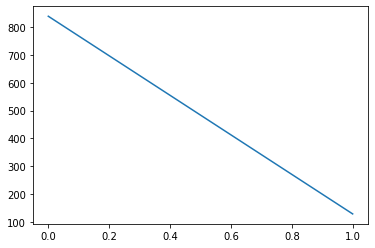

In [ ]:
plt.plot(spectrogram.shape)

# Model 2 experiment (MOD Dataset ) @Ashik 

In [ ]:
len(os.listdir('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles'))

5815

In [ ]:
files_in = os.listdir('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles')

In [ ]:
files_in[:5]

['7480.wav', '1327.wav', '28547.wav', '14496.wav', '12415.wav']

In [ ]:
def preprocess_df(df,base_path = '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/'):
  for i,x in enumerate(df['filename']):

    df['filename'][i] = str(base_path+ df['filename'][i][:-3] + "wav")
  try:
    bf = pd.get_dummies(df['emotion'])
  except : 
    print('looks like test data huh ! ')
    return df 

  return pd.concat([df,bf],axis = 1 )

In [ ]:
train_preprocessed = preprocess_df(train_df)

In [ ]:
train_preprocessed.head()

,filename,emotion,anger,disgust,fear,joy,neutral,sadness,surprise
0,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0
1,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0
2,/content/drive/Shareddrives/Tabata/cogito_audi...,joy,0,0,0,1,0,0,0
3,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0
4,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0


In [ ]:
train_preprocessed = train_preprocessed.drop(index = 18)

In [ ]:
non_existant = 0 
existant = 0
for x in train_preprocessed.filename.to_numpy():
  path_obj = Path(x)
  if not path_obj.exists():
    print('duh duh')
    non_existant += 1   
  else : 
    existant +=1 

(0, 5815)

In [ ]:
classes_dict = {'neutral': 0 , 'joy': 1 , 'disgust' : 2 , 
              'surprise': 3 , 'sadness': 4 , 'fear': 5 , 
              'anger': 6}
classes_dict

{'anger': 6,
 'disgust': 2,
 'fear': 5,
 'joy': 1,
 'neutral': 0,
 'sadness': 4,
 'surprise': 3}

In [ ]:
# Mapping the label 
train_preprocessed['emotion_labels'] = train_preprocessed['emotion'].map(lambda x: classes_dict[x])
train_preprocessed

,filename,emotion,anger,disgust,fear,joy,neutral,sadness,surprise,emotion_labels
0,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
1,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
2,/content/drive/Shareddrives/Tabata/cogito_audi...,joy,0,0,0,1,0,0,0,1
3,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
4,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5811,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
5812,/content/drive/Shareddrives/Tabata/cogito_audi...,fear,0,0,1,0,0,0,0,5
5813,/content/drive/Shareddrives/Tabata/cogito_audi...,neutral,0,0,0,0,1,0,0,0
5814,/content/drive/Shareddrives/Tabata/cogito_audi...,surprise,0,0,0,0,0,0,1,3


In [ ]:


def decoding_fun(file_path):
  audio_binary = tf.io.read_file(file_path)
  audio,sample_rate = tf.audio.decode_wav(audio_binary,desired_channels = 1)
  # print(audio.shape)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  audio = tf.squeeze(audio, axis = -1)
  # wav = tfio.audio.resample(audio, rate_in=sample_rate,rate_out= 16000)
  # fade = tfio.audio.fade(
  #   audio, fade_in=1000, fade_out=2000, mode="logarithmic")
  fade = tfio.audio.fade(
    audio, fade_in=1000, fade_out=2000, mode="logarithmic")
  spectrogram = tfio.audio.spectrogram(
    fade, nfft=512, window=512, stride=256)
  spect = tf.math.log(spectrogram)
  dims =  tf.expand_dims(spect,axis = 2 )
  dims = tf.keras.layers.experimental.preprocessing.Resizing(250, 250)(dims)
  return dims 

In [ ]:
decoding_fun(train_preprocessed['filename'][12]).shape

TensorShape([250, 250, 1])

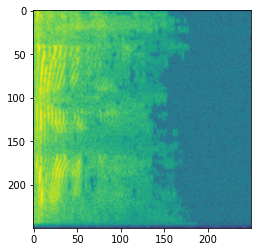

In [ ]:
plt.imshow(tf.squeeze(decoding_fun(train_preprocessed['filename'][22])))

In [ ]:

# indexes = []
# count = 0 
# for index, x in tqdm(enumerate(train_preprocessed.filename)):
#   try:
#     decoding_fun(x)
#   except:
#     count +=1 
#     indexes.append(index)

In [ ]:
input_data = tf.data.Dataset.from_tensor_slices(train_preprocessed.filename.to_numpy().astype(np.str)).map(decoding_fun)

In [ ]:
# yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
# yamnet_model = hub.load(yamnet_model_handle)

In [ ]:
# def extract_embedding(wav_data):
#   ''' run YAMNet to extract embedding from the wav data '''
#   scores, embeddings, spectrogram = yamnet_model(wav_data)
#   return embeddings


In [ ]:
# input_data = input_data.map(extract_embedding)

In [ ]:
output_data = tf.data.Dataset.from_tensor_slices(train_preprocessed.drop(['filename','emotion'],axis = 1).values.astype(np.int32))
# output_data = tf.data.Dataset.from_tensor_slices(train_preprocessed.emotion_labels.to_numpy().astype(np.uint8))

In [ ]:
train_preprocessed.drop(['filename','emotion'],axis = 1).values.astype(np.int32)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [ ]:
train_dataset = tf.data.Dataset.zip((input_data, output_data)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None, 250, 250, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 7), dtype=tf.int32, name=None))

In [ ]:
inputs = tf.keras.layers.Input(shape = [250, 250,1])
# x =  tf.keras.layers.experimental.preprocessing.Resizing(250, 250)(inputs) 
x= tf.keras.layers.Conv2D(64,3,padding='same')(inputs)
x = tf.keras.layers.Conv2D(32,3,padding='same')(x)
x = tf.keras.layers.GlobalMaxPool2D()(x)
# x = tf.keras.layers.Dense(128)(x)
# x = tf.keras.layers.Dense(128)(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.GlobalAvgPool1D()(x)
# x = tf.keras.layers.Dense(32,activation ='relu')(x)
x = tf.keras.layers.Dense(16)(x)
outputs = tf.keras.layers.Dense(7, activation= 'softmax')(x) 
model_2 = tf.keras.Model(inputs,outputs)

model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      18464     
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 19,751
Trainable params: 19,751
Non-trainable params: 0
_________________________________________________________

In [ ]:
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

In [ ]:
model_2.fit(
    train_dataset,
    steps_per_epoch = int(len(train_dataset)) 
    ,epochs = 3)

Epoch 1/3
182/182 [==============================] - 1600s 9s/step - loss: nan - accuracy: 0.1027
Epoch 2/3
182/182 [==============================] - 1570s 9s/step - loss: nan - accuracy: 0.1025
Epoch 3/3
182/182 [==============================] - 1571s 9s/step - loss: nan - accuracy: 0.1025


In [ ]:
# model_2.save('/content/drive/Shareddrives/Tabata/cogito challenge /models/model_nan_loss')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/cogito challenge /models/model_nan_loss/assets


In [ ]:
def decode_audio(file_path):
  try:
    file_path = file_path.decode('utf-8')
  except: 
    pass 
  # print(file_path)
  audio_binary = tf.io.read_file(file_path)
  if file_path[-3:] == 'mp3':
    audio= tfio.audio.decode_mp3(audio_binary,desired_channels=1)
  else :
    audio,sample_rate = tf.audio.decode_wav(audio_binary)
  #   # print(audio.shape)
  # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # audio = tf.squeeze(audio, axis = -1)
  # # wav = tfio.audio.resample(audio, rate_in=sample_rate,rate_out= 16000)

  # if audio.shape[0] < 100000:
  #   to_append = 100000 - audio.shape[0]
  #   # print(to_append)
  #   # print(audio.numpy())
  #   audio = np.concatenate((audio.numpy(),np.zeros(to_append).astype(np.float32)))
  audio = tf.squeeze(audio, axis = -1)
  fade = tfio.audio.fade(
    audio, fade_in=1000, fade_out=2000, mode="logarithmic")
  spectrogram = tfio.audio.spectrogram(
    fade, nfft=512, window=512, stride=256)
  spect = tf.math.log(spectrogram)
  dims =  tf.expand_dims(spect,axis = 2 )
  dims = tf.keras.layers.experimental.preprocessing.Resizing(250, 250)(dims)
  return dims 

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.filename.to_numpy().astype(np.str)))

In [ ]:
len(os.listdir('/content/dataset/TestAudioFiles')),len(os.listdir('/content/dataset/TrainAudioFiles'))

(2492, 5816)

In [ ]:
test_dataset = test_dataset.map(decode_audio)

ValueError: ignored